In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
catdf = []

for col in train.columns:
  if train[col].dtypes == 'object':
    catdf.append(col)

In [32]:
train['MiscFeature'].fillna(0,inplace=True)

In [33]:
train['MiscFeature'].replace(0,'None',inplace=True)

In [34]:
train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [35]:
train['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [36]:
train['Fence'].fillna('None',inplace=True)

In [37]:
train['PoolQC'].fillna('None',inplace=True)

In [38]:
train['GarageCond'].fillna('None',inplace=True)

In [39]:
train.isnull().sum().head(20)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
dtype: int64

In [40]:
cat = train.select_dtypes(include='object')

In [41]:
cat.fillna('None',inplace=True)

In [42]:
cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [43]:
inti = train.select_dtypes(include='int64')
flo = train.select_dtypes(include='float')

In [44]:
flo.isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [45]:
flo['LotFrontage'].fillna(flo['LotFrontage'].mean(),inplace=True)

In [46]:
flo['MasVnrArea'].fillna(0,inplace=True)

In [47]:
flo['GarageYrBlt'].fillna(flo['GarageYrBlt'].mean(),inplace=True)

In [48]:
trainf = pd.concat([cat, flo, inti], axis=1)

In [49]:
trainf.isnull().sum()

MSZoning       0
Street         0
Alley          0
LotShape       0
LandContour    0
              ..
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
SalePrice      0
Length: 81, dtype: int64

In [50]:
train=pd.get_dummies(trainf,drop_first=True)

In [51]:
train.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Id', 'MSSubClass',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=262)

In [52]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [53]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [54]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [55]:
pca = PCA(n_components=5)
X_transformed = pca.fit_transform(X)

In [56]:
pca.components_

array([[ 6.78079141e-04,  1.88403791e-03, -5.82830472e-05, ...,
        -1.25388150e-07,  2.10436682e-07,  6.45422368e-07],
       [ 1.11857676e-02,  1.17915169e-01,  1.19640466e-02, ...,
         1.64537635e-06, -8.81171376e-05,  1.05681982e-04],
       [ 1.81563114e-03,  7.41353590e-03,  2.05298586e-03, ...,
         4.24141932e-06, -2.39704134e-05,  1.26729738e-05],
       [-1.32109262e-04,  3.02343685e-02, -1.96320163e-03, ...,
        -6.13347224e-06,  8.38829181e-05, -8.28803027e-05],
       [ 5.19693526e-04, -8.89382392e-03, -1.88850657e-04, ...,
        -8.98494901e-07,  5.94053819e-06,  7.62673177e-06]])

In [57]:
pca.explained_variance_

array([99684879.73736879,   501072.58421642,   343070.12981924,
         281106.28115439,   244472.79900627])

<BarContainer object of 5 artists>

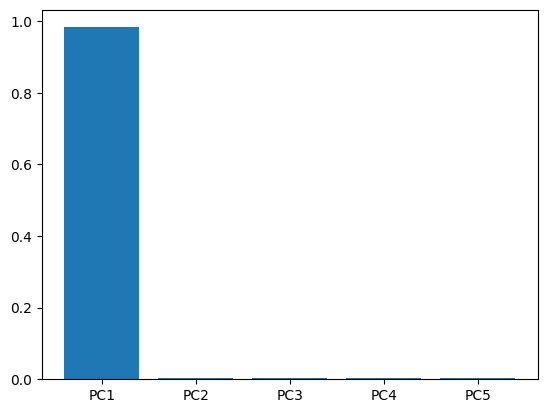

In [58]:
plt.bar(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], pca.explained_variance_ratio_)

In [59]:
pcadf = pd.DataFrame(X_transformed)

In [60]:
pcadf['SalePrice'] = train['SalePrice']

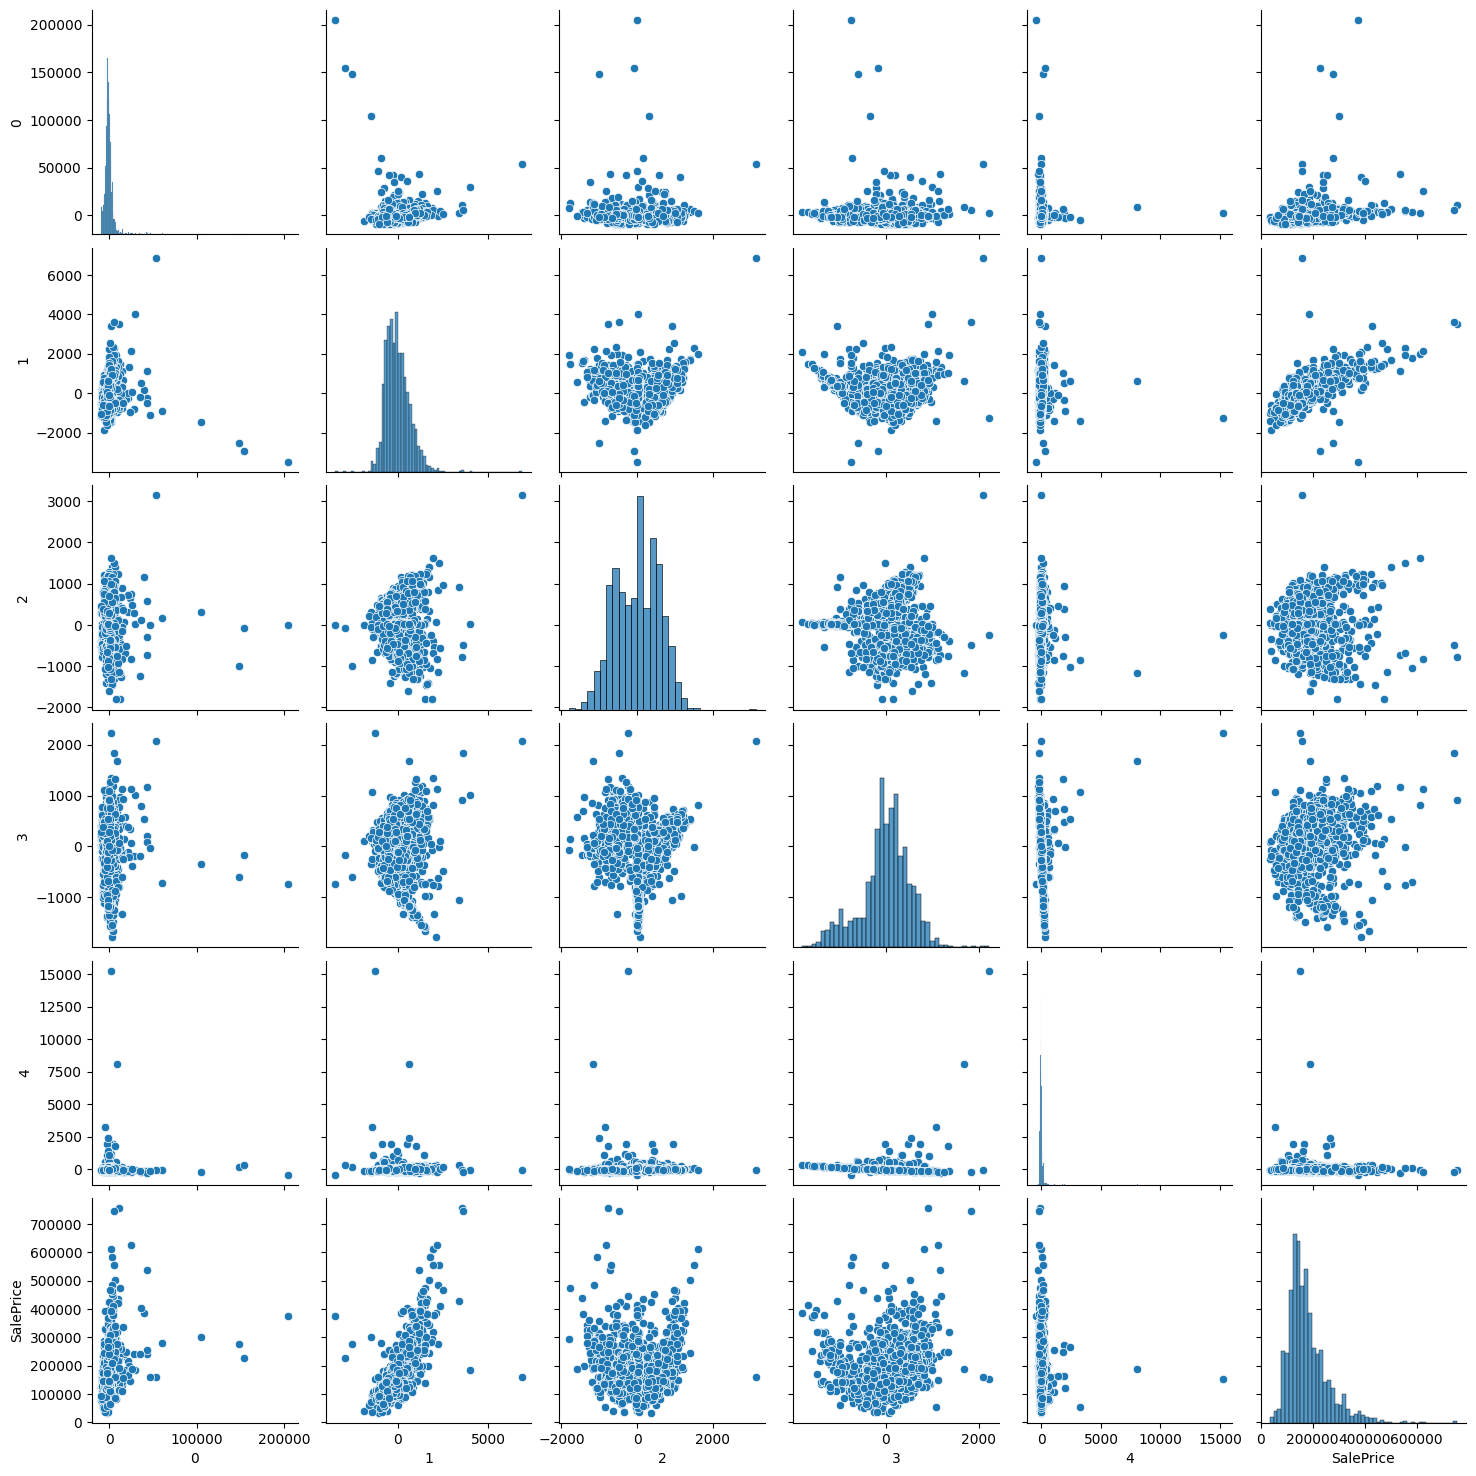

In [61]:
sns.pairplot(pcadf)

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rfr = RandomForestRegressor()
rfr.fit(pcadf.drop('SalePrice',axis=1),pcadf['SalePrice'])
prediction = rfr.predict(pcadf.drop('SalePrice',axis=1))

In [64]:
from sklearn.metrics import mean_squared_error,r2_score

In [65]:
mse = mean_squared_error(pcadf['SalePrice'],prediction)

In [66]:
np.sqrt(mse)

16485.27706681894

In [67]:
r2_score(pcadf['SalePrice'],prediction)

0.9569092326003925

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
gbr = GradientBoostingRegressor()
gbr.fit(pcadf.drop('SalePrice',axis=1),pcadf['SalePrice'])
gbr_pred = gbr.predict(pcadf.drop('SalePrice',axis=1))

gbr_mse = mean_squared_error(pcadf['SalePrice'],gbr_pred)

In [72]:
np.sqrt(gbr_mse)

29249.806796587807

In [73]:
import xgboost as xgb
xgbr = xgb.XGBRegressor()

In [74]:
xgbr.fit(pcadf.drop('SalePrice',axis=1),pcadf['SalePrice'])
xgbr_pred = xgbr.predict(pcadf.drop('SalePrice',axis=1))

xgbr_mse = mean_squared_error(pcadf['SalePrice'],xgbr_pred)

In [75]:
np.sqrt(xgbr_mse)

6974.497146318471

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {'n_estimators':[50,100,150],'max_depth':[3,6,9,12],'learning_rate':[0.01,0.1,0.4,0.8,1]}

gscv = GridSearchCV(gbr, param_grid, cv=5)

In [78]:
#gscv.fit(pcadf.drop('SalePrice',axis=1),pcadf['SalePrice'])

In [81]:
#gscv.best_params_

In [82]:
gbr1 = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50)

In [83]:
gbr1.fit(pcadf.drop('SalePrice',axis=1),pcadf['SalePrice'])
gbr1_pred = gbr1.predict(pcadf.drop('SalePrice',axis=1))

gbr1_mse = mean_squared_error(pcadf['SalePrice'],gbr1_pred)

In [84]:
np.sqrt(gbr1_mse)

32982.93970348518

In [86]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 101.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 128.8 MB/s eta 0:0

In [87]:
# Import libraries
import numpy as np
from pycaret.regression import *

# Set up the environment and data for modeling
data = pcadf.drop('SalePrice',axis=1)
target = pcadf['SalePrice']  # Use log-transformed SalePrice as the target
setup(data=data, target=target)

# Compare multiple regression models
compare_models()


,Description,Value
0,Session id,4865
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 6)"
4,Transformed data shape,"(1460, 6)"
5,Transformed train set shape,"(1021, 6)"
6,Transformed test set shape,"(439, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,28997.8654,2131264599.2868,45801.4381,0.6557,0.2128,0.1657,0.3060
rf,Random Forest Regressor,29548.9727,2187954709.9578,46550.5086,0.6488,0.2173,0.1693,0.5430
lightgbm,Light Gradient Boosting Machine,31150.6237,2374529521.0816,48548.3025,0.6155,0.2252,0.1772,0.2760
gbr,Gradient Boosting Regressor,30133.8364,2393261924.7510,48484.9392,0.6127,0.2198,0.1707,0.2620
ada,AdaBoost Regressor,34879.7808,2510301896.0539,49886.7851,0.5969,0.2575,0.2173,0.2280
xgboost,Extreme Gradient Boosting,30918.7700,2515076485.7902,49816.4361,0.5925,0.2284,0.1739,0.1870
knn,K Neighbors Regressor,32605.1837,2672750039.4133,50956.6313,0.5844,0.2348,0.1840,0.0360
br,Bayesian Ridge,31542.9606,2837557034.1592,51691.2526,0.5051,0.2297,0.1817,0.0490
llar,Lasso Least Angle Regression,31536.0748,2839655667.8537,51698.6123,0.5043,0.2292,0.1817,0.0470
en,Elastic Net,31536.0758,2839654924.9156,51698.6088,0.5043,0.2292,0.1817,0.1390


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=4865)

In [92]:
train.isnull().sum()>0

LotFrontage              False
MasVnrArea               False
GarageYrBlt              False
Id                       False
MSSubClass               False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 262, dtype: bool

In [93]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
train_sc = scaler.fit_transform(train.drop('SalePrice',axis=1))

In [97]:
train_scaled = pd.DataFrame(train_sc,columns=train.columns.drop('SalePrice'))

In [98]:
train_scaled

,LotFrontage,MasVnrArea,GarageYrBlt,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.229372,0.514104,1.021157,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.451936,-0.570750,-0.104483,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-0.093110,0.325915,0.937776,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-0.456474,-0.570750,0.812705,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.633618,1.366489,0.896086,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.365633,-0.570750,0.854395,1.721374,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,0.679039,0.087911,-0.021102,1.723747,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,-0.183951,-0.570750,-1.563645,1.726120,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.093110,-0.570750,-1.188432,1.728492,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5571817220453678288, *['LotFrontage'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5571817220453678288, *['MasVnrArea'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5571817220453678288, *['GarageYrBlt'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5571817220453678288, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5571817220453678288, *['LotFrontage'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5571817220453678288, *['MasVnrArea'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5571817220453678288, *['GarageYrBlt'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5571817220453678288, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5571817220453678288, *[[['LotFrontage', 'MasVnrArea'], ['MasVnrArea', 'GarageYrBlt'], ['GarageYrBlt', 'Id'], ['Id', 'MSSubClass']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5571817220453678288, *['Id', 'LotFrontage', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5571817220453678288, *['Id', 'MasVnrArea', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5571817220453678288, *['Id', 'GarageYrBlt', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5571817220453678288, *['Id', 'MSSubClass', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5571817220453678288, *['LotFrontage'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5571817220453678288, *['MasVnrArea'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5571817220453678288, *['GarageYrBlt'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5571817220453678288, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5571817220453678288, *['LotFrontage'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5571817220453678288, *['MasVnrArea'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5571817220453678288, *['GarageYrBlt'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5571817220453678288, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5571817220453678288, *[[['LotFrontage', 'MasVnrArea'], ['MasVnrArea', 'GarageYrBlt'], ['GarageYrBlt', 'Id'], ['Id', 'MSSubClass']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5571817220453678288, *['Id', 'LotFrontage', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5571817220453678288, *['Id', 'MasVnrArea', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5571817220453678288, *['Id', 'GarageYrBlt', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5571817220453678288 = autoviz.get_df('df_5571817220453678288')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5571817220453678288, *['Id', 'MSSubClass', None], **{})
chart

In [100]:
train_scaled['SalePrice']=train['SalePrice']

In [101]:
from pycaret.regression import *

data = train_scaled.drop('SalePrice',axis=1)
target = train_scaled['SalePrice']

setup(data=data,target=target)

compare_models()

,Description,Value
0,Session id,4548
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 262)"
4,Transformed data shape,"(1460, 262)"
5,Transformed train set shape,"(1021, 262)"
6,Transformed test set shape,"(439, 262)"
7,Numeric features,261
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,16551.7310,747562850.8025,26523.8362,0.8636,0.1351,0.0966,0.7610
en,Elastic Net,17121.5891,778997172.5807,27280.9713,0.8619,0.1357,0.0989,0.0990
gbr,Gradient Boosting Regressor,16369.1361,748346318.0915,26388.8243,0.8591,0.1315,0.0951,0.6920
br,Bayesian Ridge,16849.4677,800835217.0435,27225.5429,0.8583,0.1555,0.1005,0.1320
llar,Lasso Least Angle Regression,16603.3787,823848545.1551,27406.4209,0.8527,0.1499,0.0979,0.1180
rf,Random Forest Regressor,17851.1462,847113096.8672,28516.8333,0.8508,0.1459,0.1052,1.5860
et,Extra Trees Regressor,17974.5357,850670715.6298,28553.5699,0.8495,0.1487,0.1073,1.7250
xgboost,Extreme Gradient Boosting,17845.2271,863243655.3039,28380.7358,0.8419,0.1430,0.1034,1.1370
huber,Huber Regressor,16910.9884,898054352.8365,28780.4053,0.8418,0.2109,0.1030,0.3460
ridge,Ridge Regression,18011.5994,958558023.7931,29762.5598,0.8311,0.1911,0.1085,0.0900


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(random_state=4548)

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [115]:
test.loc[:,test.isnull().sum()>0].columns

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [114]:
len(test.select_dtypes(include='object').columns)

43

In [110]:
test['Alley'].describe()

count      107
unique       2
top       Grvl
freq        70
Name: Alley, dtype: object

In [116]:
test_cat = test.select_dtypes(include='object')

In [118]:
test_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [120]:
for col in test_cat.columns:
  test_cat[col].fillna('None',inplace=True)

In [123]:
test_cat.isnull().sum().sum()

0

In [124]:
test_inti = test.select_dtypes(include='int64')
test_flo = test.select_dtypes(include='float64')

In [126]:
test_flo.isnull().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [128]:
for col in test_flo.columns:
  test_flo[col].fillna(test_flo[col].mean(),inplace=True)

In [129]:
test_f = pd.concat([test_cat,test_flo,test_inti],axis=1)

In [131]:
test_f.isnull().sum().sum()

0

In [137]:
test_f = pd.get_dummies(test_f,drop_first=True)

In [138]:
test_pca = pca.fit_transform(test_f)

In [140]:
pcatest = pd.DataFrame(test_pca)

In [141]:
pcatest

,0,1,2,3,4
0,1761.532090,-470.942784,459.827496,-455.202858,-24.133659
1,4674.814287,7037.222434,9156.366396,4193.196744,1449.035082
2,3994.497551,-251.264640,102.524569,56.926292,-725.725220
3,148.386568,-75.504310,-30.496147,165.766982,-514.461264
4,-4805.392568,367.463080,-254.263824,-193.514124,586.107186
...,...,...,...,...,...
1454,-7930.048498,-465.590219,259.979975,415.633165,96.891707
1455,-7965.143962,-359.640408,312.727779,242.184098,-205.921661
1456,10171.002087,-398.393166,515.305923,-847.782392,-439.729291
1457,597.015374,-134.232596,927.423526,-4.530824,448.240915


In [143]:
xgbr_t = xgbr.predict(pcatest)

In [145]:
len(xgbr_t)

1459

In [153]:
test.reset_index().columns

Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'P

In [154]:
submission1 = pd.DataFrame(xgbr_t,index=test['Id'])

In [157]:
submission1.rename(columns={0:'SalePrice'},inplace=True)

In [158]:
submission1

,SalePrice
Id,
1461,121442.382812
1462,342293.562500
1463,201793.968750
1464,158055.609375
1465,153078.937500
...,...
2915,142684.093750
2916,136659.953125
2917,172328.390625


In [159]:
test_f

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.000000,1.0,...,0,0,0,0,1,0,0,0,1,0
1,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.000000,1.0,...,0,0,0,0,1,0,0,0,1,0
2,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.000000,2.0,...,0,0,0,0,1,0,0,0,1,0
3,78.0,20.0,602.0,0.0,324.0,926.0,0.0,0.0,1998.000000,2.0,...,0,0,0,0,1,0,0,0,1,0
4,43.0,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,1992.000000,2.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,1977.721217,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.000000,1.0,...,0,0,0,0,1,0,0,0,0,0
1456,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.000000,2.0,...,0,0,0,0,1,0,0,0,0,0
1457,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,1977.721217,0.0,...,0,0,0,0,1,0,0,0,1,0


In [165]:
test_scaled1 = scaler.fit_transform(test_f)

In [166]:
test_scaled = pd.DataFrame(test_scaled1,columns=test_f.columns)

In [178]:
trc = train_scaled.columns
tec = test_scaled.columns

trc.intersection(tec)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Id', 'MSSubClass',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=242)

In [183]:
trf=train_scaled[trc.intersection(tec)]
trf['SalePrice']=train_scaled['SalePrice']
trf

,LotFrontage,MasVnrArea,GarageYrBlt,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,-0.229372,0.514104,1.021157,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,208500
1,0.451936,-0.570750,-0.104483,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,181500
2,-0.093110,0.325915,0.937776,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,223500
3,-0.456474,-0.570750,0.812705,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995,140000
4,0.633618,1.366489,0.896086,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.365633,-0.570750,0.854395,1.721374,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,175000
1456,0.679039,0.087911,-0.021102,1.723747,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,210000
1457,-0.183951,-0.570750,-1.563645,1.726120,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,266500
1458,-0.093110,-0.570750,-1.188432,1.728492,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,142125


In [184]:
tef=test_scaled[trc.intersection(tec)]

<Axes: >

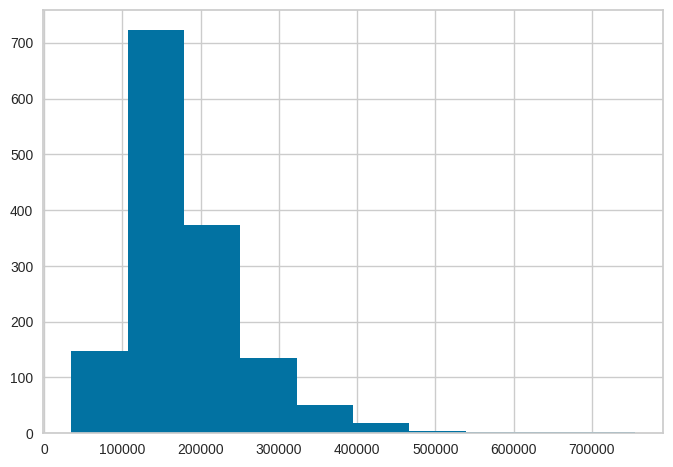

In [169]:
train_scaled['SalePrice'].hist()

In [185]:
gbr.fit(X=trf.drop('SalePrice',axis=1),y=trf['SalePrice'])

GradientBoostingRegressor()

In [187]:
gbrp=gbr.predict(tef)

In [188]:
submission2 = pd.DataFrame(gbrp,index=test['Id'])

In [190]:
submission2.to_csv('Submission GBR.csv')
submission1.to_csv('Submission XGBR.csv')

In [191]:
submission2

,0
Id,
1461,129287.453401
1462,164512.438581
1463,179830.030348
1464,184846.948760
1465,202736.338033
...,...
2915,83698.580070
2916,85333.389784
2917,168500.941091


In [192]:
submission2.rename(columns={0:'SalePrice'},inplace=True)

In [195]:
submission2.to_csv('Submission GBR1.csv')

In [196]:
submission1.to_csv('Submission XGBR1.csv')